# 1. Problem Definition:

BrightPath Academy has a problem identifing at risk students early enough, which hinders their ablity to provide personalized support to students on time.Although they have collected data on their students. This data includes various aspects of the students life that could be affecting their performance in class, like extracurricular activites, parental involvment academic performance, study habits and more.However they lack the insights about the data to help solve this problem

# 2. Hypothesis Generation:

1. Students with lower study hours  will have lower GPAS 
2. Students with low to none parental involvment will have lower GPS's on average 
3. Students with Higher Absences will have lower GPA's on average
4. Students engaging in tutuoring will have a higher average than those who are not 
5. `add more if you can think of them`

# 3. Getting the system ready and loading the data:

In [61]:
# Import required libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [62]:
# Display full columns and Improve formatting
pd.set_option('display.max_columns', None)
sns.set(style='whitegrid')

In [63]:
# Load the dataset
df = pd.read_csv("../data/Student_performance_data.csv")
df.head(5)

,StudentID,Age,Gender,Ethnicity,ParentalEducation,StudyTimeWeekly,Absences,Tutoring,ParentalSupport,Extracurricular,Sports,Music,Volunteering,GPA,GradeClass
0,1001,17,1,0,2,19.833723,7,1,2,0,0,1,0,2.929196,2.0
1,1002,18,0,0,1,15.408756,0,0,1,0,0,0,0,3.042915,1.0
2,1003,15,0,2,3,4.210570,26,0,2,0,0,0,0,0.112602,4.0
3,1004,17,1,0,3,10.028829,14,0,3,1,0,0,0,2.054218,3.0
4,1005,17,1,0,2,4.672495,17,1,3,0,0,0,0,1.288061,4.0


# 4. Understanding the data:

## Features of data:

### Student Information
- StudentID: A unique identifier assigned to each student (1001 to 3392).

### Demographic details
- Age: The age of the students ranges from 15 to 18 years.
- Gender: Gender of the students, where 0 represents Male and 1 represents Female.
- Ethnicity: The ethnicity of the students, coded as follows:
    - 0: Caucasian
    - 1: African American
    - 2: Asian
    - 3: Other

### ParentalEducation: The education level of the parents, coded as follows:
- 0: None
- 1: High School
- 2: Some College
- 3: Bachelor's
- 4: Higher Study

### Study Habits
- StudyTimeWeekly: Weekly study time in hours, ranging from 0 to 20.
- Absences: Number of absences during the school year, ranging from 0 to 30.
- Tutoring: Tutoring status, where 0 indicates No and 1 indicates Yes.

### Parental Involvement
- ParentalSupport: The level of parental support, coded as follows:
    - 0: None
    - 1: Low
    - 2: Moderate
    - 3: High
    - 4: Very High

### Extracurricular Activities
- Extracurricular: Participation in extracurricular activities, where 0 indicates No and 1 indicates Yes.
    - Sports: Participation in sports, where 0 indicates No and 1 indicates Yes.
    - Music: Participation in music activities, where 0 indicates No and 1 indicates Yes.
    - Volunteering: Participation in volunteering, where 0 indicates No and 1 indicates Yes.

### Academic Performance
- GPA: Grade Point Average on a scale from 2.0 to 4.0, influenced by study habits, parental involvement, and extracurricular activities.

### Target Variable: Grade Class
- GradeClass: Classification of students' grades based on GPA:
    - 0: 'A' (GPA >= 3.5)
    - 1: 'B' (3.0 <= GPA < 3.5)
    - 2: 'C' (2.5 <= GPA < 3.0)
    - 3: 'D' (2.0 <= GPA < 2.5) 
    - 4: 'F' (GPA < 2.0)

## Basic info of Data

We'll start by getting  basic information about the data usnig some methods prevelant in the pandas library. 

In [64]:
df.describe().T ## gettins some descriptive statistics about the data

,count,mean,std,min,25%,50%,75%,max
StudentID,2392.0,2196.500000,690.655244,1001.000000,1598.750000,2196.500000,2794.250000,3392.000000
Age,2392.0,16.468645,1.123798,15.000000,15.000000,16.000000,17.000000,18.000000
Gender,2392.0,0.510870,0.499986,0.000000,0.000000,1.000000,1.000000,1.000000
Ethnicity,2392.0,0.877508,1.028476,0.000000,0.000000,0.000000,2.000000,3.000000
ParentalEducation,2392.0,1.746237,1.000411,0.000000,1.000000,2.000000,2.000000,4.000000
StudyTimeWeekly,2392.0,9.771992,5.652774,0.001057,5.043079,9.705363,14.408410,19.978094
Absences,2392.0,14.541388,8.467417,0.000000,7.000000,15.000000,22.000000,29.000000
Tutoring,2392.0,0.301421,0.458971,0.000000,0.000000,0.000000,1.000000,1.000000
ParentalSupport,2392.0,2.122074,1.122813,0.000000,1.000000,2.000000,3.000000,4.000000
Extracurricular,2392.0,0.383361,0.486307,0.000000,0.000000,0.000000,1.000000,1.000000


In [65]:
print("Shape of dataset:", df.shape)

Shape of dataset: (2392, 15)


In [66]:
print("\nMissing values:")
print(df.isnull().sum())


Missing values:
StudentID            0
Age                  0
Gender               0
Ethnicity            0
ParentalEducation    0
StudyTimeWeekly      0
Absences             0
Tutoring             0
ParentalSupport      0
Extracurricular      0
Sports               0
Music                0
Volunteering         0
GPA                  0
GradeClass           0
dtype: int64


In [67]:
print("Data types:")
print(df.dtypes)

Data types:
StudentID              int64
Age                    int64
Gender                 int64
Ethnicity              int64
ParentalEducation      int64
StudyTimeWeekly      float64
Absences               int64
Tutoring               int64
ParentalSupport        int64
Extracurricular        int64
Sports                 int64
Music                  int64
Volunteering           int64
GPA                  float64
GradeClass           float64
dtype: object


In [68]:
print("Number of duplicate rows:", df.duplicated().sum())

Number of duplicate rows: 0


## Visualization of Data

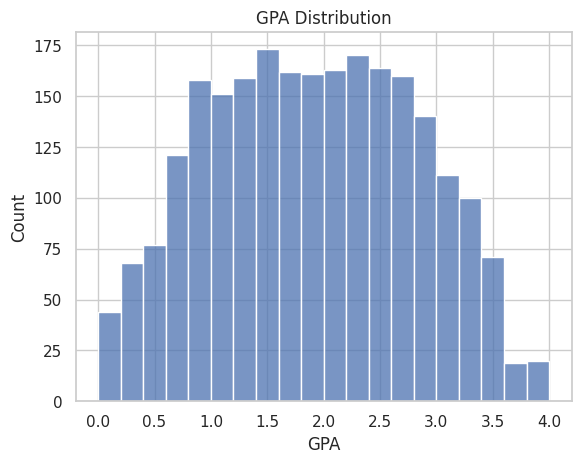

In [69]:
# GPA Distribution
sns.histplot(df['GPA'], bins=20)
plt.title("GPA Distribution")
plt.show()

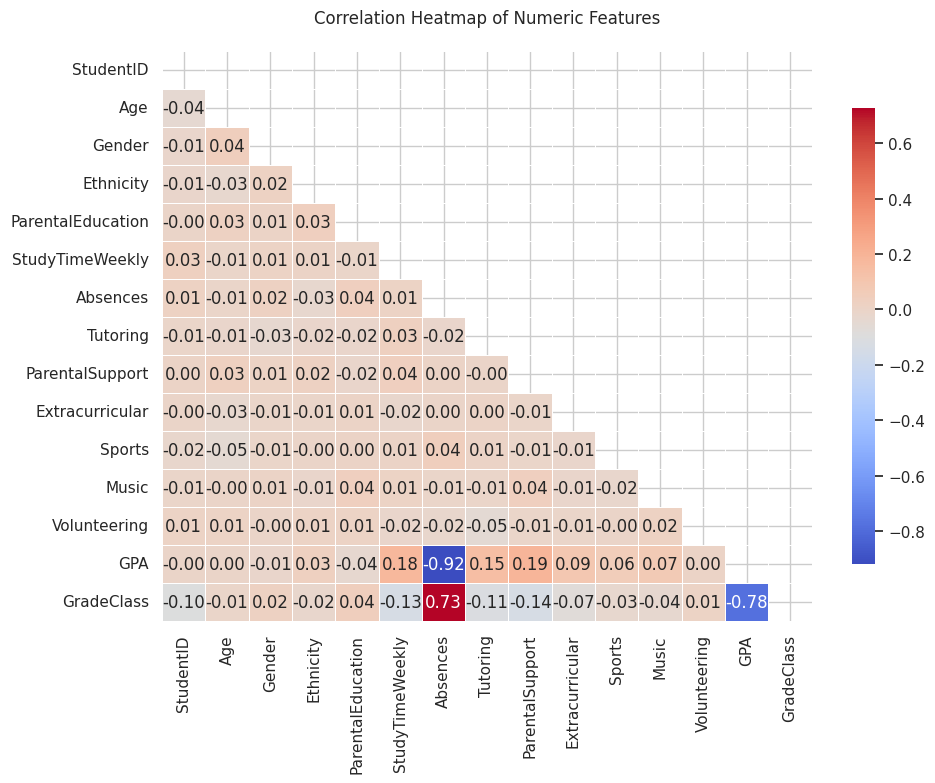

In [76]:
# Compute the correlation matrix
corr = df.corr(numeric_only=True)

# Create a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

plt.figure(figsize=(10, 8))
sns.heatmap(corr, mask=mask, annot=True, fmt=".2f", cmap='coolwarm', linewidths=0.5, linecolor='white', cbar_kws={"shrink": 0.8})
plt.title("Correlation Heatmap of Numeric Features", pad=20)
plt.tight_layout()
plt.show()


# 5. Exploratory Data Analysis:

We'll be explore the date in the following ways 
- univariate analysis ( exploring 1 variable at a time )
- bivariate analysis ( exploring 2 variables at a time )
- using plots to visualize relationships between variables to find some sort of patterns before modelling


<Axes: xlabel='GradeClass'>

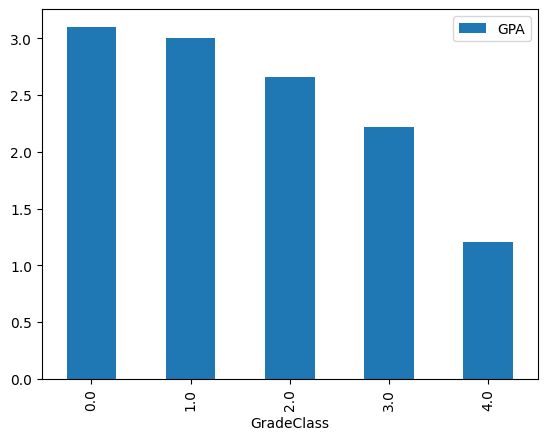

In [ ]:
## Start EDA FROM HERE 
## eda should answer all the hypthoses questions by creating graphs or using comparisons between avereags, sums, counts etc. 
df_grouped = df.groupby('GradeClass').mean()

df_grouped['GradeClass'] = df_grouped.index

df_Zero = df[df['GradeClass'] == 0.0]
df_grouped.plot.bar(x='GradeClass',y='GPA')

##  Something wrong with grade class I think. 



Text(0.5, 1.0, ' Number of students at each Age group')

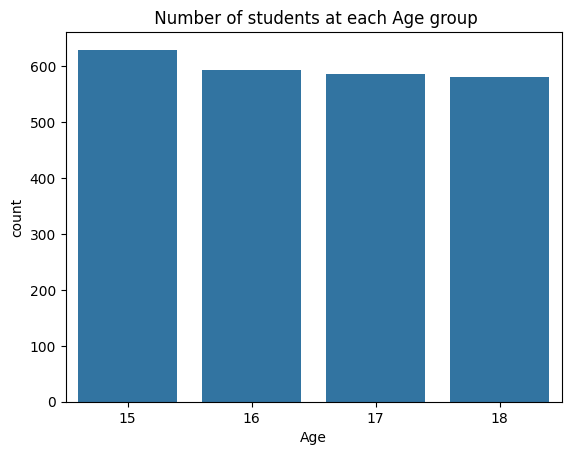

In [ ]:
sns.countplot(data=df,x='Age')
plt.title(' Number of students at each Age group')

In [ ]:
df.head()

,StudentID,Age,Gender,Ethnicity,ParentalEducation,StudyTimeWeekly,Absences,Tutoring,ParentalSupport,Extracurricular,Sports,Music,Volunteering,GPA,GradeClass
0,1001,17,1,0,2,19.833723,7,1,2,0,0,1,0,2.929196,2.0
1,1002,18,0,0,1,15.408756,0,0,1,0,0,0,0,3.042915,1.0
2,1003,15,0,2,3,4.210570,26,0,2,0,0,0,0,0.112602,4.0
3,1004,17,1,0,3,10.028829,14,0,3,1,0,0,0,2.054218,3.0
4,1005,17,1,0,2,4.672495,17,1,3,0,0,0,0,1.288061,4.0


Text(0.5, 1.0, 'Box and Whisker plot of Parental Support ')

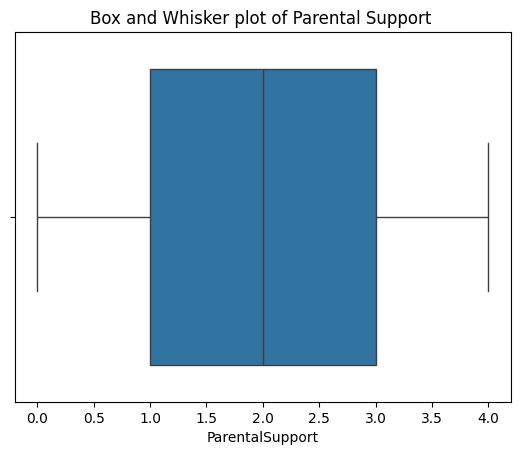

In [ ]:
sns.boxplot(data=df,x='ParentalSupport')
plt.title('Box and Whisker plot of Parental Support ')

Text(0, 0.5, 'Number of occurences')

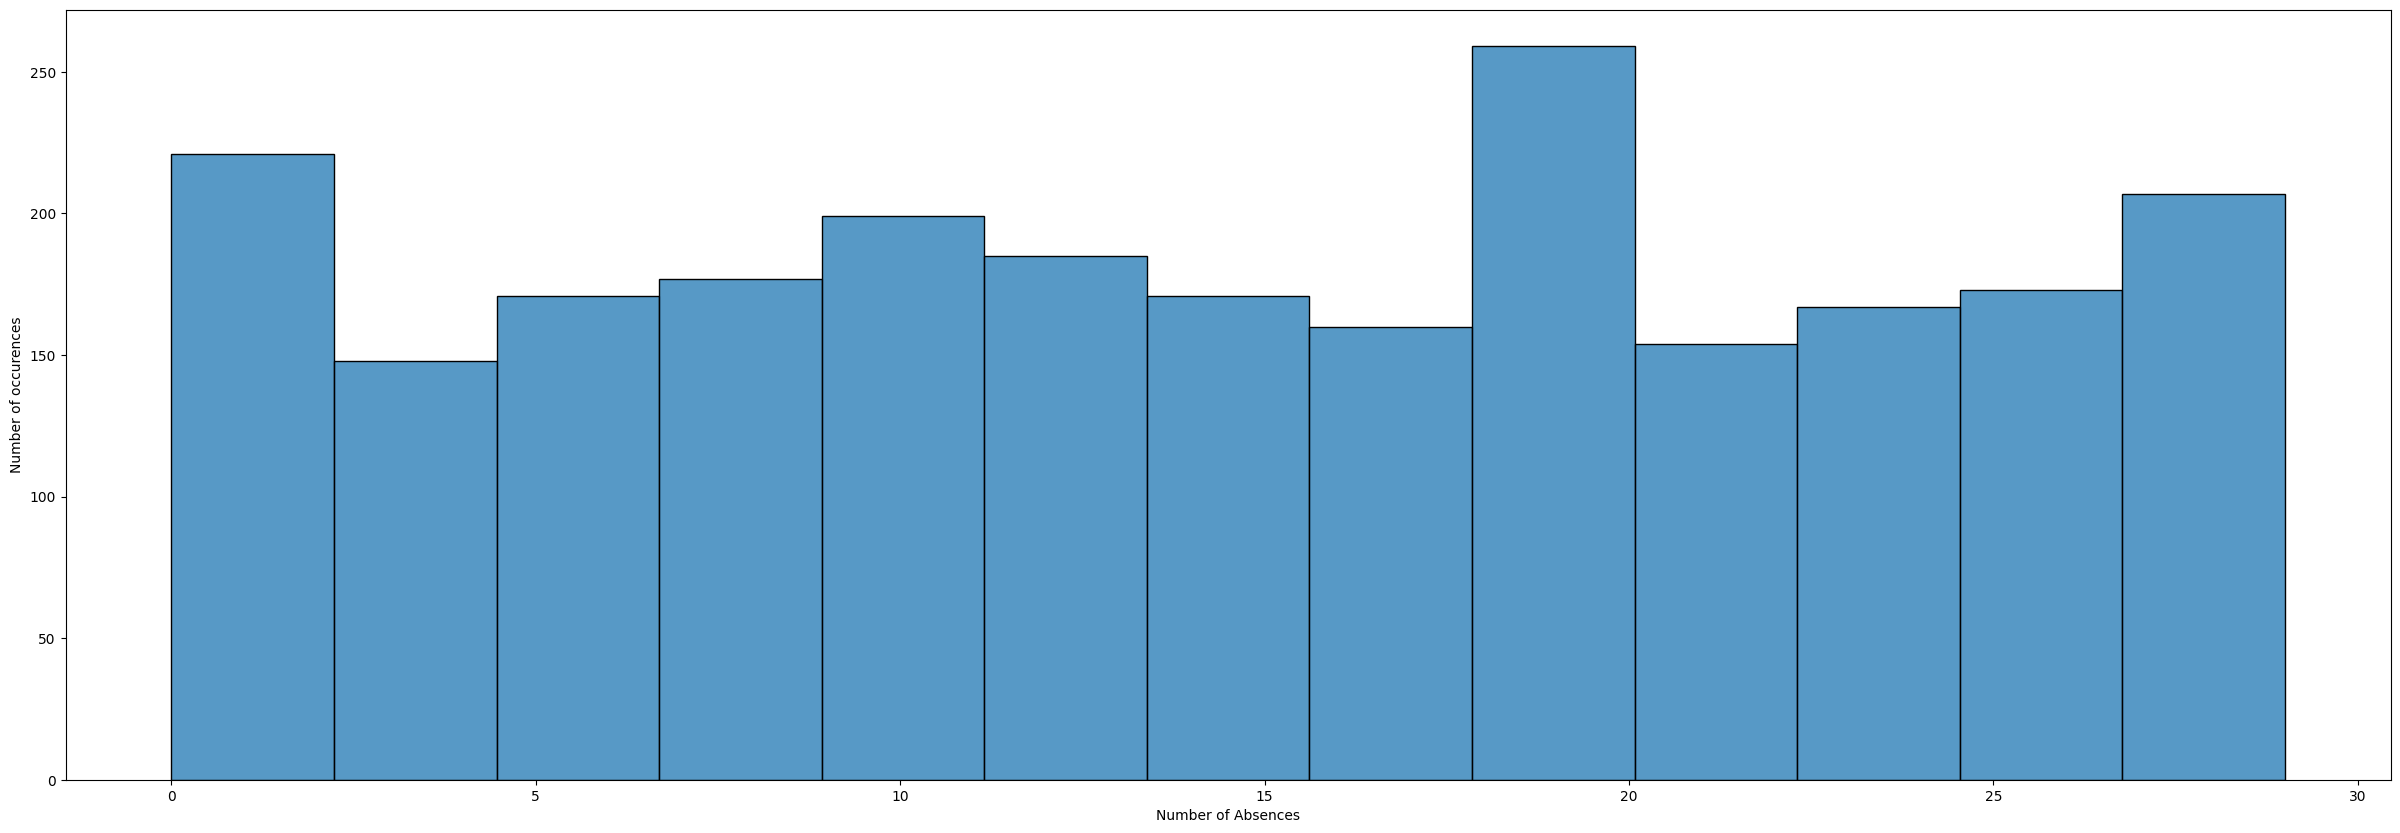

In [ ]:

fig,ax = plt.subplots(figsize =(30,10))
ax = sns.histplot(data=df,x='Absences')
plt.title
ax.set_xlabel('Number of Absences')
ax.set_ylabel('Number of occurences')


<Axes: xlabel='GPA', ylabel='Density'>

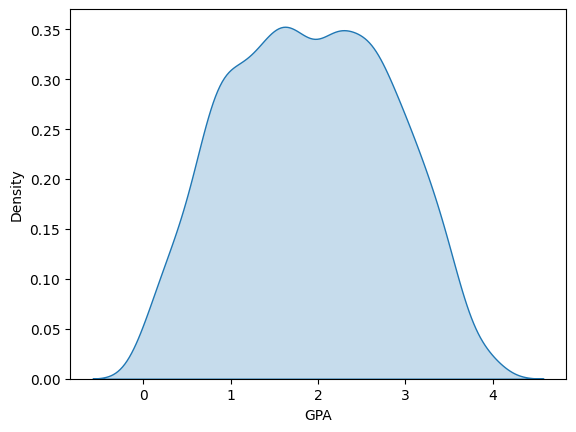

In [ ]:
sns.kdeplot(data=df,x='GPA',fill=True,legend=True   )

Text(0.5, 1.0, 'Violin Plot showing the distribution of parental education')

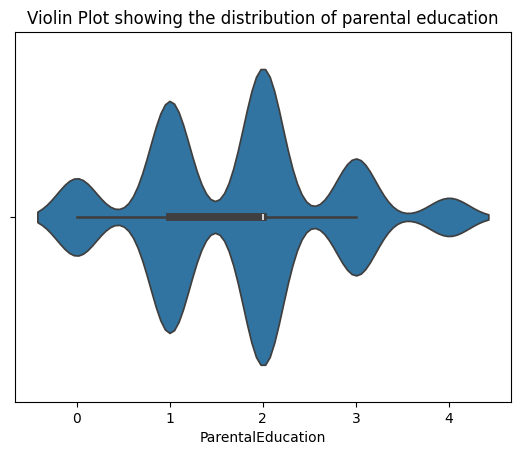

In [ ]:
sns.violinplot(data=df,x='ParentalEducation')
plt.title('Violin Plot showing the distribution of parental education')

Text(0.5, 1.0, 'Pie chart showing Gender Distribution')

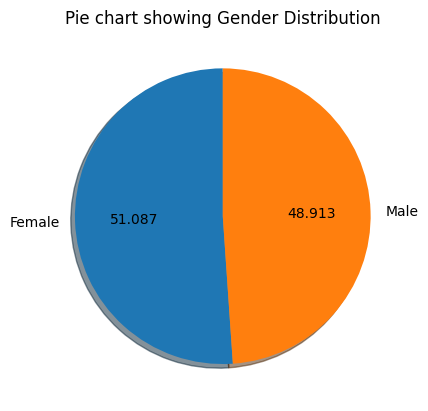

In [ ]:
gender = df['Gender']
plt.pie(gender.value_counts(),startangle=90,autopct='%.3f',labels=['Female','Male'],shadow=True)
plt.title('Pie chart showing Gender Distribution')

## Bivariate Analysis

In [ ]:
df.head(20) ## Call this multiple times to see the data we can remove duplicate instances after revision.

,StudentID,Age,Gender,Ethnicity,ParentalEducation,StudyTimeWeekly,Absences,Tutoring,ParentalSupport,Extracurricular,Sports,Music,Volunteering,GPA,GradeClass
0,1001,17,1,0,2,19.833723,7,1,2,0,0,1,0,2.929196,2.0
1,1002,18,0,0,1,15.408756,0,0,1,0,0,0,0,3.042915,1.0
2,1003,15,0,2,3,4.210570,26,0,2,0,0,0,0,0.112602,4.0
3,1004,17,1,0,3,10.028829,14,0,3,1,0,0,0,2.054218,3.0
4,1005,17,1,0,2,4.672495,17,1,3,0,0,0,0,1.288061,4.0
5,1006,18,0,0,1,8.191219,0,0,1,1,0,0,0,3.084184,1.0
6,1007,15,0,1,1,15.601680,10,0,3,0,1,0,0,2.748237,2.0
7,1008,15,1,1,4,15.424496,22,1,1,1,0,0,0,1.360143,4.0
8,1009,17,0,0,0,4.562008,1,0,2,0,1,0,1,2.896819,2.0
9,1010,16,1,0,1,18.444466,0,0,3,1,0,0,0,3.573474,0.0


Text(0.5, 1.0, 'Bar char showing the relationship between parental education and tutoring')

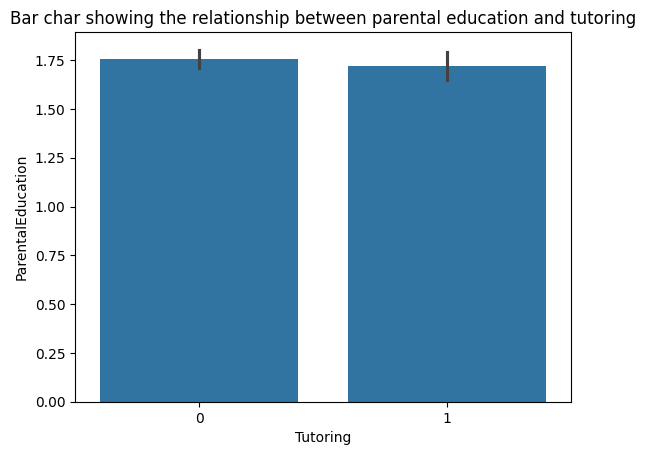

In [ ]:
sns.barplot(data=df,x='Tutoring',y='ParentalEducation')
plt.title('Bar char showing the relationship between parental education and tutoring')

Text(0.5, 1.0, 'Line graph showing the relationship between absences and GPA')

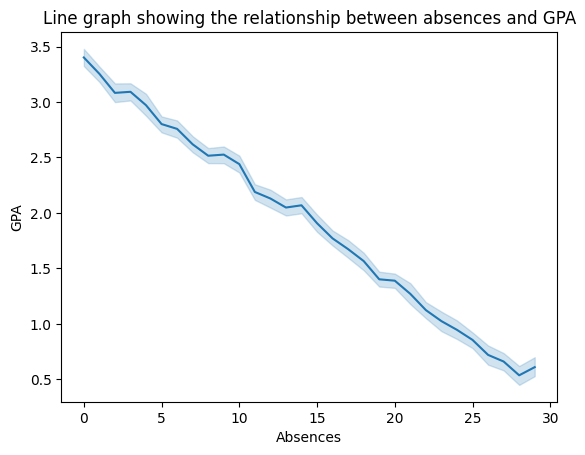

In [ ]:
sns.lineplot(data=df,x='Absences',y='GPA')
plt.title('Line graph showing the relationship between absences and GPA')

<Axes: xlabel='StudyTimeWeekly', ylabel='GPA'>

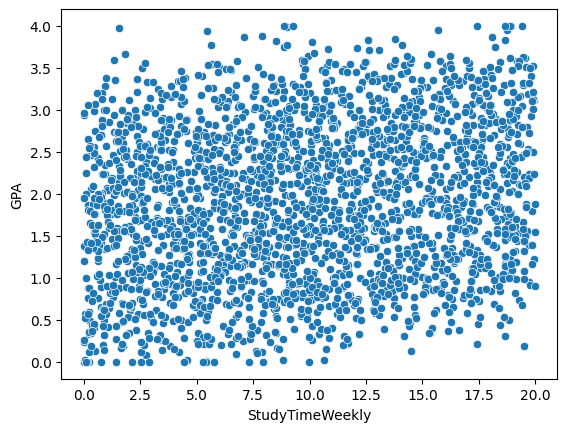

In [ ]:
sns.scatterplot(data=df,x='StudyTimeWeekly',y='GPA')


Text(0.5, 1.0, 'Bar plot showing Absences against parental Support')

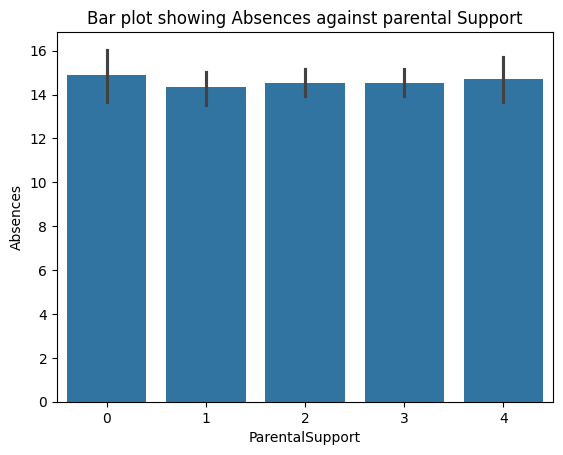

In [ ]:
sns.barplot(data=df,x='ParentalSupport',y='Absences')
plt.title('Bar plot showing Absences against parental Support')

# 6. Missing value and outlier treatment:

In [ ]:
## Handle missing values and outliers from here
df.isna().sum()

StudentID            0
Age                  0
Gender               0
Ethnicity            0
ParentalEducation    0
StudyTimeWeekly      0
Absences             0
Tutoring             0
ParentalSupport      0
Extracurricular      0
Sports               0
Music                0
Volunteering         0
GPA                  0
GradeClass           0
dtype: int64

In [ ]:
## Removing unncessary columns 

df.drop(columns='StudentID',inplace=True)

# 7. Evaluation Metrics for classification problem:

In [ ]:
## handle metrics from here

# 8. Feature engineering:

In [ ]:
## handle  faeture engineering from here 

## Model Building: Part 1 Model Building: Part 1 (Apply baseline machine learning classification algorithms:
Logistic Regression, Random Forest, and XGBoost with step 8)

In [ ]:
## from here 

## Model building: part 2 (Apply Deep Learning classification algorithm with step 8)

In [ ]:
## from here 

## Conclusion 
- what the data showed us 
- best model 
- suggestions and recommendations  moving forward